In [1]:
import numpy as np

In [117]:
X = np.array([[0.2, 0.3], [0.4, 0.3], [0.1, -0.5], [-0.4, 0.5]])
y = np.array([0.1, 0.2, -0.1, 0.2])
weight = np.array([0.5, 1.5])  # L2 norm is sqrt(2.5)
bias = 0.1
_lambda = 0.5
eta = 0.5

expected_weight = [0.0, 0.195]
expected_bias = -0.95

In [118]:
def step(
    X: np.ndarray, y: np.ndarray, weight: np.ndarray, bias: float, _lambda: float, eta: float
) -> [np.ndarray, float]:
    """Single step in ISTA algorithm.
    It should update every entry in weight, and then return an updated version of weight along with calculated bias on input weight!

    Args:
        X (np.ndarray): An (n x d) matrix, with n observations each with d features.
        y (np.ndarray): An (n, ) array, with n observations of targets.
        weight (np.ndarray): An (d,) array. Weight returned from the step before.
        bias (float): Bias returned from the step before.
        _lambda (float): Regularization constant. Determines when weight is updated to 0, and when to other values.
        eta (float): Step-size. Determines how far the ISTA iteration moves for each step.

    Returns:
        Tuple[np.ndarray, float]: Tuple with 2 entries. First represents updated weight vector, second represents bias.

    """
    # raise NotImplementedError("Your Code Goes Here")
    print("Initial weight: %s", weight)
    print("Initial bias: %s", bias)

    # Compute gradient for weight
    # gradient =  X.T @ (X @ weight + bias - y)/X.shape[0] + (_lambda * np.sign(weight))
    gradient =  2 * (X.T @ (X @ weight + bias - y))
    print("Computed gradient for weight: %s", gradient)

    # Update weight
    w_ = weight - eta * gradient

    w_ = np.where(
    w_ > 2 * eta * _lambda, w_ - 2 * eta * (_lambda),
    np.where(
        w_ < -2 * eta * _lambda, w_ +  2 * eta * (_lambda), 0
    ))
    print("Updated weight: %s", w_)
    print("Expected weight: %s", expected_weight)


    # Compute gradient for bias
    gradient_b = 2 * np.sum(X @ weight + bias - y)
    print("Computed gradient for bias: %s", gradient_b)

    # Update bias
    b_ = bias - eta * gradient_b
    print("Updated bias: %s", b_)
    print("Expected bias: %s", expected_bias)


    return w_, b_

In [119]:
actual_weight, actual_bias = step(X, y, np.copy(weight), bias, _lambda, eta)

Initial weight: %s [0.5 1.5]
Initial bias: %s 0.1
Computed gradient for weight: %s [0.2  1.61]
Updated weight: %s [0.    0.195]
Expected weight: %s [0.0, 0.195]
Computed gradient for bias: %s 2.099999999999999
Updated bias: %s -0.9499999999999996
Expected bias: %s -0.95


In [120]:
actual_weight

array([0.   , 0.195])

In [121]:
X = np.array([[0.2, 0.3], [0.4, 0.3], [0.1, -0.5], [-0.4, 0.5]])
y = np.array([0.1, 0.2, -0.1, 0.2])
weight = np.array([-0.5, 1.5])  # L1 norm is 2
bias = 0.1
_lambda = 1

expected = 3.2275

In [65]:
def loss(
    X: np.ndarray, y: np.ndarray, weight: np.ndarray, bias: float, _lambda: float
) -> float:
    """L-1 (Lasso) regularized MSE loss.

    Args:
        X (np.ndarray): An (n x d) matrix, with n observations each with d features.
        y (np.ndarray): An (n, ) array, with n observations of targets.
        weight (np.ndarray): An (d,) array. Currently predicted weights.
        bias (float): Currently predicted bias.
        _lambda (float): Regularization constant. Should be used along with L1 norm of weight.

    Returns:
        float: value of the loss function
    """

    J = np.sum((y - (X @ weight + bias)) ** 2) + _lambda * np.sum(np.abs(weight))
    return J

In [66]:
actual = loss(X, y, weight, bias, _lambda)

In [67]:
actual, expected

(3.2275, 3.2275)

In [142]:
k = 100
d = 1000
sigma = 0.2
n = 500

In [159]:
w = np.zeros(d,)
w[0:k] = w[0:k] + np.arange(1, k+1)/k

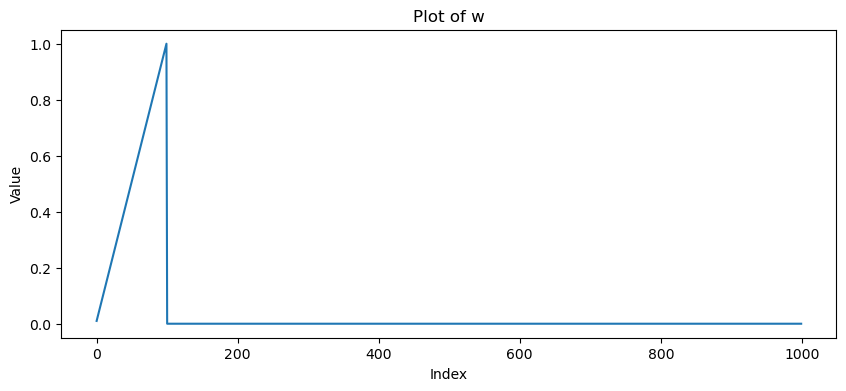

In [160]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(w)
plt.title("Plot of w")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [163]:
#data generation
X = np.random.randn(3, 4)
w = np.zeros(4,)
w[0:2] = w[0:2] + np.arange(1, 2+1)/2
y = X @ w + np.random.normal(0, 1, 3)

In [164]:
(y - np.average(y))

array([ 1.27635562, -0.67715648, -0.59919914])

In [165]:
X

array([[ 0.08381349,  0.06332732, -1.81939026, -1.34803536],
       [-0.24053098, -1.17006257, -1.03940771, -0.30104212],
       [ 0.30783316, -0.15251928,  1.00449695,  0.6158303 ]])

In [152]:
np.abs([1, 2,3,0] * np.sum(X, axis=0))

array([ 2.342998  ,  2.48202956, 11.39002974,  0.        ])

In [153]:
np.max(np.abs([1, 2,3,0] * np.sum(X, axis=0)))

11.390029736750076

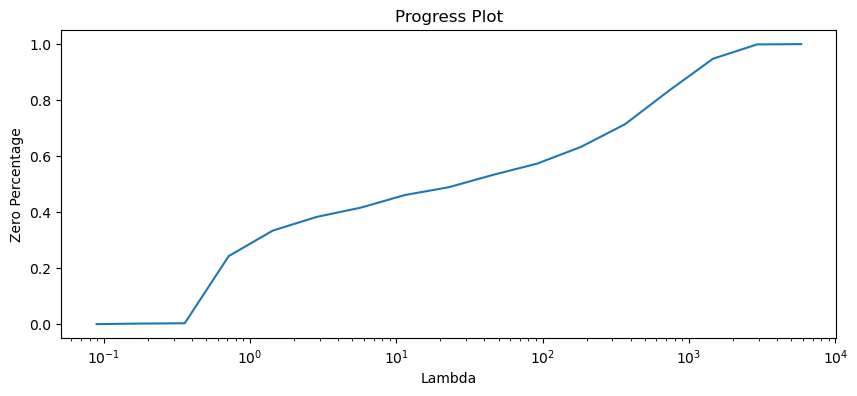

In [158]:
import csv
import matplotlib.pyplot as plt

# Initialize empty lists to hold lambda and zero_percentage values
lams = []
zero_percentages = []
# Read the progress.txt file
with open('/media/octipus/ad098048-2ec2-425c-b95b-4940e9cd3d83/446/hw2/homeworks/lasso/progress.txt', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader, None)  # Skip the header
    for row in csv_reader:
        _lambda, zero_percentage = row
        lams.append(float(_lambda))
        zero_percentages.append(float(zero_percentage))

# Convert lists to arrays if you want, for more complex numerical operations
# lams = np.array(lams)
# zero_percentages = np.array(zero_percentages)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(lams, zero_percentages)
plt.xscale('log')  # Use a log scale for better visibility
plt.title('Progress Plot')
plt.xlabel('Lambda')
plt.ylabel('Zero Percentage')
plt.show()